In [ ]:
WITH football_bets AS (
    SELECT bettorID, COUNT(DISTINCT betID) AS football_bets_count
    FROM BETS
    WHERE betSport = 'Football' AND betDate BETWEEN '2022-12-01' AND '2022-12-31'
    GROUP BY bettorID
), basketball_bets AS (
    SELECT bettorID
    FROM BETS
    WHERE betSport = 'Basketbal'
    GROUP BY bettorID
), campaign_counts AS (
    SELECT userID, channel, COUNT(DISTINCT campaignID) AS campaignsSent
    FROM CAMPAIGNS
    WHERE interactionType = 'sent' AND DATE_TRUNC('month', "timestamp") = '2022-12-01'
    GROUP BY userID, channel
), average_stakes AS (
    SELECT bettorID, AVG(betAmount) AS average_stake
    FROM BETS
    GROUP BY bettorID
)
SELECT u.userID, f.football_bets_count, c.channel, c.campaignsSent,
       CASE WHEN b.bettorID IS NOT NULL THEN 1 ELSE 0 END AS previously_bet_on_basketball,
       a.average_stake
FROM USER u
LEFT JOIN football_bets f ON u.userID = f.bettorID
LEFT JOIN campaign_counts c ON u.userID = c.userID
LEFT JOIN basketball_bets b ON c.userID = b.bettorID
LEFT JOIN average_stakes a ON u.userID = a.bettorID
WHERE u.brand = 'LiveScore' AND a.average_stake >= 10;

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns      

In [7]:
df = pd.read_csv("C:/Users/hasha/Desktop/Marketing_Data_Analyst_LiveScore_Take_Home_Task.csv")

In [8]:
df.head()

,category_id_name,campaign_id,trigger_id,action_id,message_id,profile_id,category_id,message_type,message_variant,message_language,...,conversion,promotion_id,promotion_amount,unsubscribe,complaint,open_time,click_time,create_time,expiration_time,message_type_name
0,sport,56660,22163984251,15933024720,582467359.0,11ed2141231019bdbd6a0216cfed634c,32,1,A,None,...,0,0,0,0,0,NaN,NaN,2022-09-01 16:55:00,2022-09-01 17:55:00,ios_push
1,sport,56660,22163984251,15933024720,582467359.0,11ecb771c94b2973bd6a0216cfed634c,32,1,A,None,...,0,0,0,0,0,NaN,NaN,2022-09-01 16:55:00,2022-09-01 17:55:00,ios_push
2,sport,56660,22163984251,15933024720,582467359.0,11ecb0366282f53dbd6a0216cfed634c,32,1,A,None,...,0,0,0,0,0,NaN,NaN,2022-09-01 16:55:00,2022-09-01 17:55:00,ios_push
3,sport,56660,22163984251,15933024720,582467359.0,11ecc462c402eeeabd6a0216cfed634c,32,1,A,None,...,0,0,0,0,0,NaN,NaN,2022-09-01 16:55:00,2022-09-01 17:55:00,ios_push
4,sport,56660,22163984251,15933024720,582467359.0,11ecb2e79d4a32f6bd6a0216cfed634c,32,1,A,None,...,0,0,0,0,0,NaN,NaN,2022-09-01 16:55:00,2022-09-01 17:55:00,ios_push


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324742 entries, 0 to 324741
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   category_id_name      324742 non-null  object 
 1   campaign_id           324742 non-null  int64  
 2   trigger_id            324742 non-null  int64  
 3   action_id             324742 non-null  int64  
 4   message_id            324742 non-null  float64
 5   profile_id            324742 non-null  object 
 6   category_id           324742 non-null  int64  
 7   message_type          324742 non-null  int64  
 8   message_variant       324742 non-null  object 
 9   message_language      324742 non-null  object 
 10  message_param_domain  324742 non-null  object 
 11  error                 324742 non-null  int64  
 12  error_message         324742 non-null  object 
 13  status                324742 non-null  int64  
 14  control               324742 non-null  int64  
 15  

In [10]:
df.isnull().sum()

category_id_name             0
campaign_id                  0
trigger_id                   0
action_id                    0
message_id                   0
profile_id                   0
category_id                  0
message_type                 0
message_variant              0
message_language             0
message_param_domain         0
error                        0
error_message                0
status                       0
control                      0
collapse                     0
delivery                     0
remove                       0
open                         0
click                        0
conversion                   0
promotion_id                 0
promotion_amount             0
unsubscribe                  0
complaint                    0
open_time               252621
click_time              314548
create_time                  0
expiration_time         160311
message_type_name            0
dtype: int64

In [11]:
df.describe()

,campaign_id,trigger_id,action_id,message_id,category_id,message_type,error,status,control,collapse,delivery,remove,open,click,conversion,promotion_id,promotion_amount,unsubscribe,complaint
count,324742.000000,3.247420e+05,3.247420e+05,3.247420e+05,324742.000000,324742.00000,324742.000000,324742.0,324742.0,324742.0,324742.000000,324742.0,324742.000000,324742.000000,324742.0,324742.000000,324742.0,324742.000000,324742.000000
mean,57710.600384,2.346507e+10,1.712085e+10,5.902912e+08,32.593850,4.03622,0.000724,1.0,0.0,0.0,0.000622,0.0,1.707466,0.035293,0.0,13.288909,0.0,0.000277,0.000068
std,2573.094081,7.162038e+08,6.706843e+08,3.829051e+06,0.916076,2.85405,0.026891,0.0,0.0,0.0,0.024933,0.0,4.344689,0.248655,0.0,247.969256,0.0,0.016645,0.008231
min,37148.000000,2.215410e+10,1.592340e+10,5.822253e+08,32.000000,1.00000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,57509.000000,2.287104e+10,1.653639e+10,5.873918e+08,32.000000,1.00000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,57983.000000,2.362530e+10,1.725869e+10,5.911416e+08,32.000000,2.00000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,58541.000000,2.411536e+10,1.773737e+10,5.935001e+08,34.000000,7.00000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,59859.000000,2.436757e+10,1.798309e+10,5.958973e+08,40.000000,7.00000,1.000000,1.0,0.0,0.0,1.000000,0.0,318.000000,30.000000,0.0,4645.000000,0.0,1.000000,1.000000


In [12]:
numeric_cols = ["campaign_id", "trigger_id", "action_id", "profile_id", "category_id", "error", "status", "control", "collapse", "delivery", "remove", "open", "click", "conversion", "promotion_id", "promotion_amount", "unsubscribe", "complaint"]
numeric_data = df[numeric_cols]
summary_stats = numeric_data.describe()
print(summary_stats)

         campaign_id    trigger_id     action_id    category_id  \
count  324742.000000  3.247420e+05  3.247420e+05  324742.000000   
mean    57710.600384  2.346507e+10  1.712085e+10      32.593850   
std      2573.094081  7.162038e+08  6.706843e+08       0.916076   
min     37148.000000  2.215410e+10  1.592340e+10      32.000000   
25%     57509.000000  2.287104e+10  1.653639e+10      32.000000   
50%     57983.000000  2.362530e+10  1.725869e+10      32.000000   
75%     58541.000000  2.411536e+10  1.773737e+10      34.000000   
max     59859.000000  2.436757e+10  1.798309e+10      40.000000   

               error    status   control  collapse       delivery    remove  \
count  324742.000000  324742.0  324742.0  324742.0  324742.000000  324742.0   
mean        0.000724       1.0       0.0       0.0       0.000622       0.0   
std         0.026891       0.0       0.0       0.0       0.024933       0.0   
min         0.000000       1.0       0.0       0.0       0.000000       0.0   
2

In [13]:
category_counts = df["category_id_name"].value_counts()
print(category_counts)

sport             218910
sport + casino     83617
casino             21713
testing              479
transactional         23
Name: category_id_name, dtype: int64


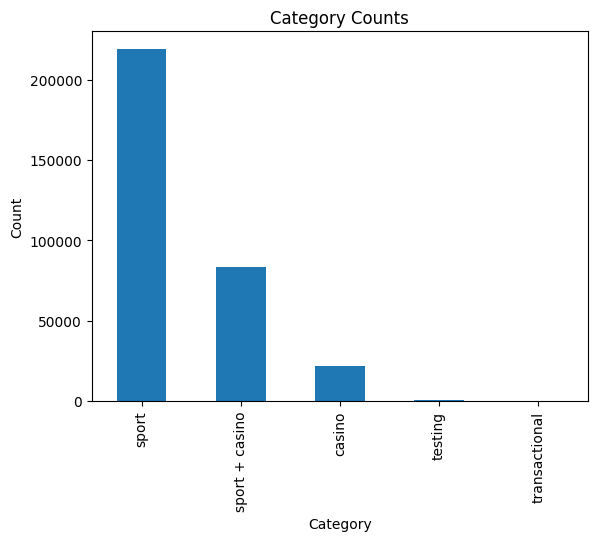

In [14]:
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Counts")
plt.show()

In [18]:
message_param_counts = df["message_type_name"].value_counts()
print(message_param_counts)

email           155056
ios_push        114440
android_push     55043
inapp              203
Name: message_type_name, dtype: int64


In [22]:
ax = sns.countplot('message_type_name',data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

TypeError: countplot() got multiple values for argument 'data'

In [23]:
df['engagement'] = df[['open', 'click']].apply(lambda x: 'Engaged' if x.sum() > 0 else 'Not Engaged', axis=1)


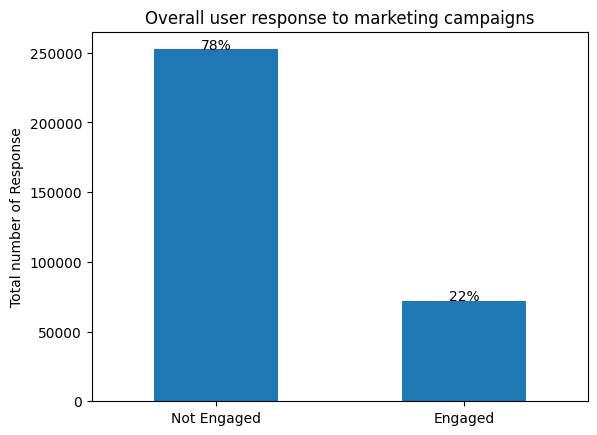

In [85]:
engagement_counts = df['engagement'].value_counts()
engagement_percentages = (engagement_counts / engagement_counts.sum()) * 100

fig, ax = plt.subplots()
ax = engagement_counts.plot(kind='bar')

# Add the percentage values on top of each bar
for i, v in enumerate(engagement_counts):
    ax.text(i, v + 2, f"{engagement_percentages[i]:.0f}%", ha='center')
plt.xticks(rotation=0)
ax.set_ylabel('Total number of Response')
ax.set_title('Overall user response to marketing campaigns')
plt.show()

In [25]:
engagement_counts

Not Engaged    252475
Engaged         72267
Name: engagement, dtype: int64

In [26]:
df['engagement']

0         Not Engaged
1         Not Engaged
2         Not Engaged
3         Not Engaged
4         Not Engaged
             ...     
324737    Not Engaged
324738        Engaged
324739        Engaged
324740    Not Engaged
324741    Not Engaged
Name: engagement, Length: 324742, dtype: object

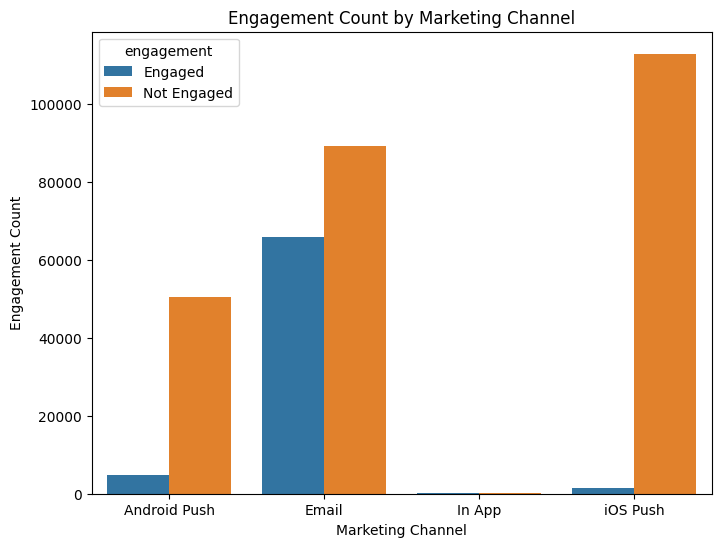

In [50]:
grouped_data = df.groupby(['message_type_name', 'engagement']).size().reset_index(name='count')

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the grouped data
ax = sns.barplot(x='message_type_name', y='count', hue='engagement', data=grouped_data)

# Add labels and title
plt.xlabel('Marketing Channel')
plt.ylabel('Engagement Count')
plt.title('Engagement Count by Marketing Channel')
new_labels = ['Android Push', 'Email', 'In App','iOS Push']

# Set the new labels on the x-axis
ax.set_xticklabels(new_labels)


# Show the plot
plt.show()

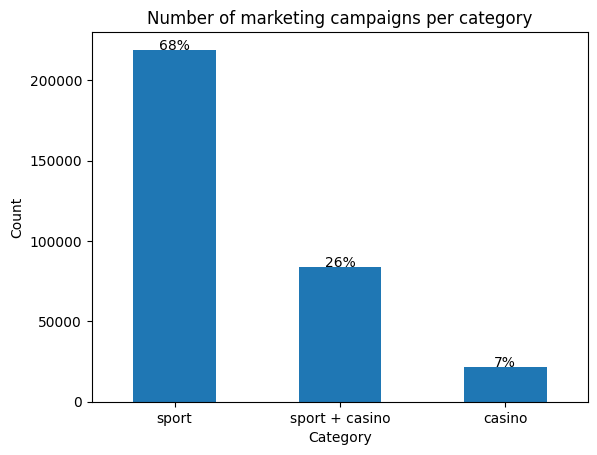

In [84]:
filtered_data = df[df['category_id_name'].isin(['casino', 'sport', 'sport + casino'])]
occurrence_count = filtered_data['category_id_name'].value_counts()
occurrence_percentages = (occurrence_count / occurrence_count.sum()) * 100

# Set the figure size
fig, ax = plt.subplots()
ax = occurrence_count.plot(kind='bar')


for i, v in enumerate(occurrence_count):
    ax.text(i, v + 1, f"{occurrence_percentages[i]:.0f}%", ha='center')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of marketing campaigns per category')
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [ ]:
total_customers = df['profile_id'].nunique()

# Count the total number of unique customers who clicked
clicked_customers = df[df['click'] == 1]['customer_id'].nunique()

# Calculate the CTR
ctr = (clicked_customers / total_customers) * 100

# Print the CTR
print(f"CTR: {ctr:.2f}%")

In [80]:
email_data = df[df['message_type_name'] == 'email']

# Group by profile_id and calculate the sum of open and click counts
email_counts = email_data.groupby('profile_id').sum()

# Get the open count and click count
open_count = email_counts['open'].sum()
click_count = email_counts['click'].sum()

print("Open count:", open_count)
print("Click count:", click_count)


Open count: 548125
Click count: 5100


C:\Users\hasha\AppData\Local\Temp\ipykernel_21172\3918533931.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  email_counts = email_data.groupby('profile_id').sum()


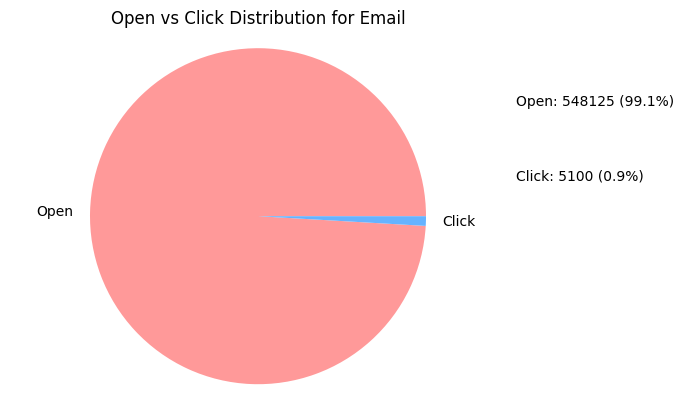

In [81]:
import matplotlib.pyplot as plt

# Data labels
labels = ['Open', 'Click']

# Data values
sizes = [open_count, click_count]

# Pie chart colors
colors = ['#FF9999', '#66B3FF']

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors)

# Add a title
ax.set_title('Open vs Click Distribution for Email')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add count values outside the pie chart
total = sum(sizes)
for i, (size, label) in enumerate(zip(sizes, labels)):
    percentage = size / total * 100
    ax.text(1.02, 0.8 - i * 0.2, f'{label}: {size} ({percentage:.1f}%)', transform=ax.transAxes)

# Display the chart
plt.show()


In [ ]:
for i, (open_count, click_count) in enumerate(zip(email_counts['open'], email_counts['click'])):
    ax.text(i, open_count, str(open_count), ha='center', va='bottom')
    ax.text(i, click_count, str(click_count), ha='center', va='bottom', color='red')

# Show the plot
plt.show()